<a href="https://colab.research.google.com/github/Shraddha-Dwivedi/EDA_and_Machine_Learning/blob/main/Cars_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("cars_train.csv",header=None)


In [3]:
train

,0,1,2,3,4,5,6
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good
...,...,...,...,...,...,...,...
1377,low,vhigh,5more,4,big,med,acc
1378,low,vhigh,3,more,med,low,unacc
1379,high,vhigh,5more,4,med,high,unacc
1380,med,med,4,4,big,low,unacc


In [4]:
train.shape

(1382, 7)

In [5]:
train.describe(include='all')

,0,1,2,3,4,5,6
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,4
top,high,vhigh,5more,more,big,high,unacc
freq,349,352,349,466,467,463,959


In [6]:
train.columns=['buying','maint','door','persons','lug_boot','safety','classes']

In [7]:
train

,buying,maint,door,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good
...,...,...,...,...,...,...,...
1377,low,vhigh,5more,4,big,med,acc
1378,low,vhigh,3,more,med,low,unacc
1379,high,vhigh,5more,4,med,high,unacc
1380,med,med,4,4,big,low,unacc


In [8]:
train.isnull().sum()

,0
buying,0
maint,0
door,0
persons,0
lug_boot,0
safety,0
classes,0


In [9]:
train

,buying,maint,door,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good
...,...,...,...,...,...,...,...
1377,low,vhigh,5more,4,big,med,acc
1378,low,vhigh,3,more,med,low,unacc
1379,high,vhigh,5more,4,med,high,unacc
1380,med,med,4,4,big,low,unacc


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in train.columns:
    train[x]=le.fit_transform(train[x])

In [11]:
train

,buying,maint,door,persons,lug_boot,safety,classes
0,3,0,1,2,2,1,2
1,1,3,1,1,2,2,2
2,1,0,3,2,0,1,2
3,0,2,2,0,2,2,2
4,1,1,1,2,0,2,1
...,...,...,...,...,...,...,...
1377,1,3,3,1,0,2,0
1378,1,3,1,2,1,1,2
1379,0,3,3,1,1,0,2
1380,2,2,2,1,0,1,2


In [12]:
X=train.drop('classes' ,axis=1)
Y=train.classes
print(X)


      buying  maint  door  persons  lug_boot  safety
0          3      0     1        2         2       1
1          1      3     1        1         2       2
2          1      0     3        2         0       1
3          0      2     2        0         2       2
4          1      1     1        2         0       2
...      ...    ...   ...      ...       ...     ...
1377       1      3     3        1         0       2
1378       1      3     1        2         1       1
1379       0      3     3        1         1       0
1380       2      2     2        1         0       1
1381       2      1     3        2         2       0

[1382 rows x 6 columns]


In [13]:
print(Y)

0       2
1       2
2       2
3       2
4       1
       ..
1377    0
1378    2
1379    2
1380    2
1381    1
Name: classes, Length: 1382, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y , test_size=0.2,random_state=10)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=10,splitter='best')

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
y_pred=dtree.predict(X_test)

In [18]:
y_pred

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       3, 0, 2, 0, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 3, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 3, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[ 69   1   1   0]
 [  4   8   0   0]
 [  0   0 185   0]
 [  0   0   0   9]]


In [21]:
cls=classification_report(y_test,y_pred)
print("classification_report: ",cls)

classification_report:                precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.89      0.67      0.76        12
           2       0.99      1.00      1.00       185
           3       1.00      1.00      1.00         9

    accuracy                           0.98       277
   macro avg       0.96      0.91      0.93       277
weighted avg       0.98      0.98      0.98       277



In [22]:
acc=accuracy_score(y_test,y_pred)
print("accuracy_score: ",acc)

accuracy_score:  0.9783393501805054


In [23]:
print((list(zip(train.drop('classes' ,axis=1),dtree.feature_importances_))))

[('buying', np.float64(0.21976792783843332)), ('maint', np.float64(0.18220929667385857)), ('door', np.float64(0.062005934167191426)), ('persons', np.float64(0.19425872158174767)), ('lug_boot', np.float64(0.09772725134941933)), ('safety', np.float64(0.24403086838934968))]


In [24]:
sample=pd.DataFrame()
sample['Columns']=train.columns[0:-1]
sample['imp values']=dtree.feature_importances_
sample.sort_values("imp values",ascending=False)

,Columns,imp values
5,safety,0.244031
0,buying,0.219768
3,persons,0.194259
1,maint,0.182209
4,lug_boot,0.097727
2,door,0.062006


In [25]:
from sklearn import tree


In [26]:
with open(r"dtree.txt",'w') as f1:
    f1=tree.export_graphviz(dtree ,feature_names=train.columns[0:-1],out_file=f1)

In [27]:
with open(r"dtree.txt",'w') as f1:
    f1=tree.export_graphviz(dtree ,feature_names=train.columns[0:-1],out_file=f1)

In [28]:
!pip install graphviz

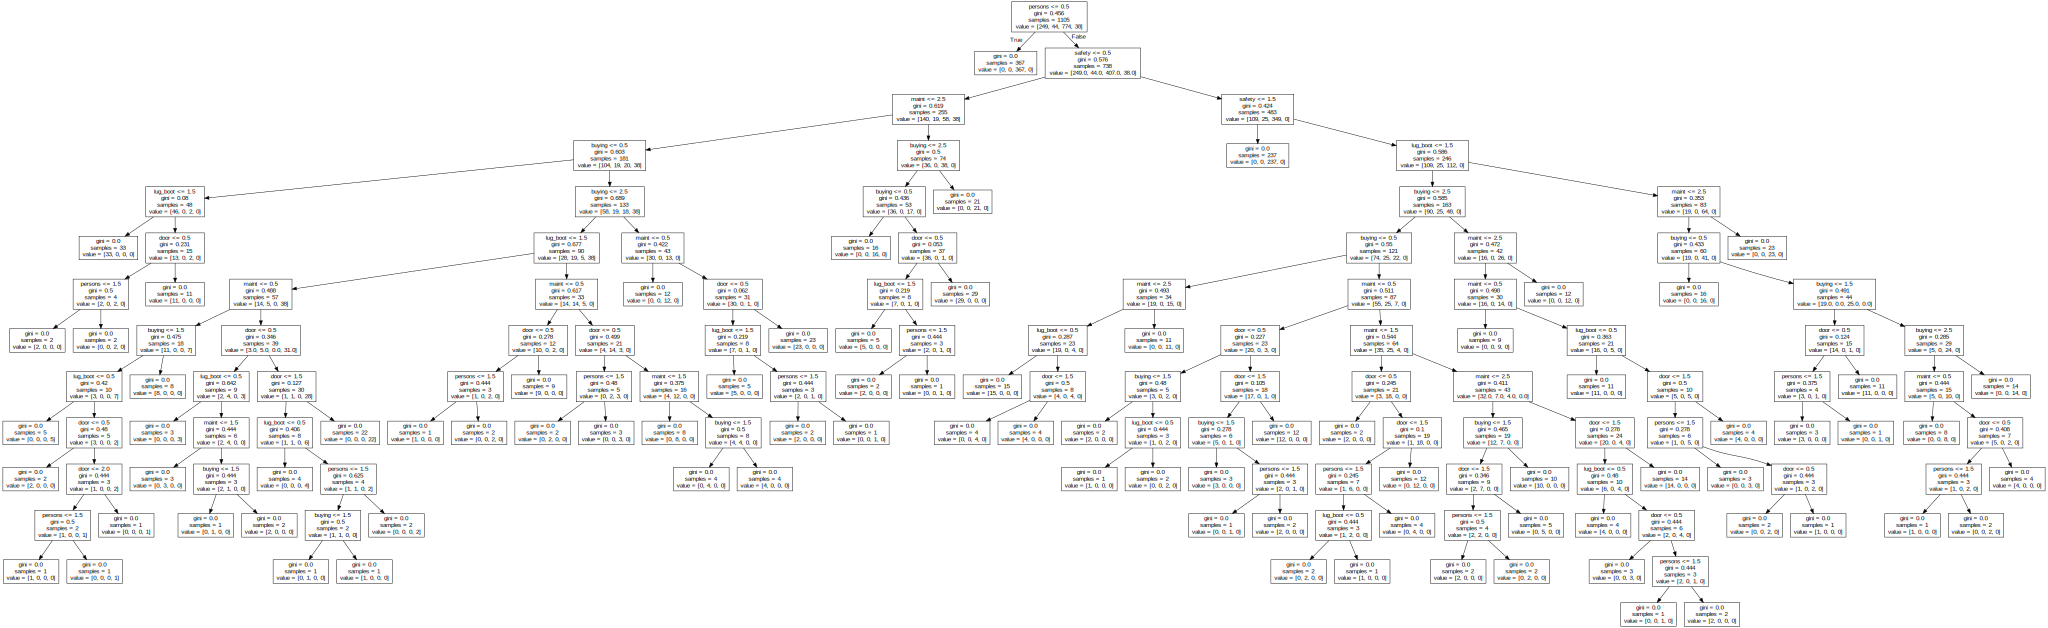

In [29]:
import graphviz

with open("dtree.txt") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))